In [1]:
import sympy as sym

import numpy as np

import repeated_play

In [2]:
import itertools

In [3]:
from tqdm.notebook import tqdm

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
def trnsf_transition_m_memory_one(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0])],
                        [player[1], (1 - player[1])]])
    else:
        M = np.array([[player[0], (1 - player[0])],
                        [player[1], (1 - player[1])]])
    return M

In [7]:
def trnsf_transition_m_memory_two(player, analytical=True):
    
    if analytical == True:
        M = sym.Matrix([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    else:
        M = np.array([[player[0], (1 - player[0]), 0, 0],
                        [0, 0, player[1], (1 - player[1])],
                        [player[2], (1 - player[2]), 0, 0],
                        [0, 0, player[3], (1 - player[3])]])
    
    
    return M

In [8]:
def trnsf_transition_m_memory_three(player, analytical=True):
    if analytical == False:
        return np.array(
            [
                [player[0], (1 - player[0]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[1], (1 - player[1]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[2], (1 - player[2]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[3], (1 - player[3])],
                [player[4], (1 - player[4]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[5], (1 - player[5]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[6], (1 - player[6]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[7], (1 - player[7])],
            ]
        )

    if analytical == True:
        return sym.Matrix(
            [
                [player[0], (1 - player[0]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[1], (1 - player[1]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[2], (1 - player[2]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[3], (1 - player[3])],
                [player[4], (1 - player[4]), 0, 0, 0, 0, 0, 0],
                [0, 0, player[5], (1 - player[5]), 0, 0, 0, 0],
                [0, 0, 0, 0, player[6], (1 - player[6]), 0, 0],
                [0, 0, 0, 0, 0, 0, player[7], (1 - player[7])],
            ]
        )

In [9]:
def match_payoffs_efficiently(player, coplayer, b, c, memory):
    if memory == "one":
        M = trnsf_transition_m_memory_one(coplayer, analytical=False)
    elif memory == "two":
        M = trnsf_transition_m_memory_two(coplayer, analytical=False)
    elif memory == "three":
        M = trnsf_transition_m_memory_three(coplayer, analytical=False)

    ss = repeated_play.stationary_distribution(M)[0]
    
    if memory == "one":
        rho_q = ss[0]
        
    elif memory == "two":
        
        rho_q = ss[0] + ss[1]
        
    elif memory == "three":
        
        rho_q = ss[0] + ss[1] + ss[4] + ss[5]
        

    rho_p = sum([ss[i] * p for i, p in enumerate(player)])


    payoff_q = (rho_p * b - c * rho_q)
    
    return payoff_q

In [10]:
def match_payoffs(player, coplayer, b, c, memory):
    if memory == 'one':
        assert(len(player) == 2)
        assert(len(coplayer) == 2)
    
    if memory == 'two':
        assert(len(player) == 4)
        assert(len(coplayer) == 4)
    
    if memory == 'three':
        assert(len(player) == 8)
        assert(len(coplayer) == 8)
    
    return match_payoffs_efficiently(player, coplayer, b, c, memory)

In [11]:
def one_bit_condition_one(p1, p2, c, b):

    return np.isclose(p2, 1 - (c / b), atol=10 ** -4) or p2 < (1 - (c / b))


def one_bit_condition_two(p1, p2, c, b):
    return p1 >= 0.95


def is_partner_one_bit(p1, p2, c, b):
    return (one_bit_condition_one(p1, p2, c, b)) and (
        one_bit_condition_two(p1, p2, c, b)
    )

In [12]:
def two_bit_condition_one(p1, p2, p3, p4, c, b):
    return np.isclose(p4, 1 - c / b, atol=10 ** -4) or p4 < (1 - c / b)


def two_bit_condition_two(p1, p2, p3, p4, c, b):
    return np.isclose(p2 + p3, 2 - c / b, atol=10 ** -3) or p2 + p3 < (2 - c / b)


def two_bit_condition_three(p1, p2, p3, p4, c, b):
    return p1 > 0.95


def is_partner_two_bits(p1, p2, p3, p4, c, b):
    return (
        (two_bit_condition_one(p1, p2, p3, p4, c, 1))
        and two_bit_condition_two(p1, p2, p3, p4, c, 1)
        and two_bit_condition_three(p1, p2, p3, p4, c, 1)
    )

In [13]:
def three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p8 < (1 - c / b)


def three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p3 + p6 < (2 - c / b)


def three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p2 + p3 + p5 < (3 - c / b)


def three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p4 + p6 + p7 < (3 - 2 * c / b)


def three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p2 + p4 + p5 + p7 < (4 - 2 * c / b)


def three_bit_condition_six(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return p1 > 0.95


def is_partner_three_bits(p1, p2, p3, p4, p5, p6, p7, p8, c, b):
    return (
        (three_bit_condition_one(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_two(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_three(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_four(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_five(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
        and (three_bit_condition_six(p1, p2, p3, p4, p5, p6, p7, p8, c, 1))
    )

### Over costs

In [ ]:
costs = np.linspace(0.1, 1, 10)

memories = ['one', 'two', 'three']

pure_strategies = [list(itertools.product([0, 1], repeat=2)),
                   list(itertools.product([0, 1], repeat=4)),
                   list(itertools.product([0, 1], repeat=8))]

dims = [2, 4, 8]

In [ ]:
costs[6]

### Checking for Nash

In [ ]:
max_iterations = 10 ** 4

bval = 1;

for cval in tqdm(costs):

    base = f"DefectingNash/cost_{cval}_"

    dnash, gnash, notdnash, notgnash = [], [], [], []

    for memory, pure_set, sdim in zip(memories, pure_strategies, dims):

        for i in range(max_iterations):

            np.random.seed(i)

            player = np.random.random(sdim)

            defecting_player = player.copy()
            defecting_player[-1] = 0

            cooperative_player = player.copy()
            cooperative_player[0] = 1

            checksA, checksB = [], []

            for coplayer in pure_set:

                payoff_defective = match_payoffs(defecting_player, coplayer, bval, cval, memory=memory)

                checkA = np.isclose(payoff_defective, 0, atol=10 ** -4) or payoff_defective < 0

                checksA.append(checkA)


                payoff_cooperative = match_payoffs(cooperative_player, coplayer, bval, cval, memory=memory)

                checkB = np.isclose(payoff_cooperative, bval - cval, atol=10 ** -4) or payoff_cooperative < (bval - cval)

                checksB.append(checkB)

            if all(checksA) == True:
                dnash.append([i, *defecting_player, *checksA, memory])
            else:
                notdnash.append([i, *defecting_player, *checksA, memory])


            if all(checksB) == True:
                gnash.append([i, *cooperative_player, *checksB, memory])
            else:
                notgnash.append([i, *cooperative_player, *checksB, memory])

    ddf = pd.DataFrame(dnash)
    nddf = pd.DataFrame(notdnash)

    gdf = pd.DataFrame(gnash)
    ngdf = pd.DataFrame(notgnash)

    ddf.to_csv(base + 'defective_Nash')

    nddf.to_csv(base + 'defective_not_Nash')

    gdf.to_csv(base + 'cooperative_Nash')

    ngdf.to_csv(base + 'cooperative_not_Nash')

In [20]:
columns1 = ['index', "pc", "pd"] + [f"N{i}" for i in range(1, 5)] + ['memory']

columns2 = ['index', "pcc", "pcd", "pdc", "pdd"] + [f"N{i}" for i in range(1, 17)] + ['memory']

In [15]:
defective_files = [f'DefectingNash/cost_{cval}_defective_Nash' for cval in costs]

cooperative_files = [f'DefectingNash/cost_{cval}_cooperative_Nash' for cval in costs]

In [16]:
len(defective_files)

10

### Checking with conditions

In [17]:
dfs = [pd.read_csv(file,
                   header=0, low_memory=False, index_col=0) for file in cooperative_files]

In [33]:
for i, cost in tqdm(enumerate(costs[:-1])):

    one = dfs[i][dfs[i]['3'] == 'True']

    one = one.dropna(axis=1, how='all')

    one.columns = columns1

    for j, row in one.iterrows():

        assert is_partner_one_bit(row['pc'], row['pd'], cost, 1)
        
        
    two = dfs[i][(dfs[i]['4'] != 'True') & (dfs[i]['5'] == 'True')]

    two = two.dropna(axis=1, how='all')

    two.columns = columns2

    for j, row in two.iterrows():

        assert is_partner_two_bits(row['pcc'], row['pcd'], float(row['pdc']), float(row['pdd']), cost, 1)

### Counting 

In [ ]:
def is_counting_defective(strategy, c, b):
    
    checks = []
    
    checks.append(np.isclose(strategy[0], c / b, atol=10 ** -4) or strategy[0] < (c / b))
    
    checks.append(np.isclose(strategy[-1], 0.05, atol=10 ** -4) or strategy[-1] < 0.05)
    
    for i, s in enumerate(strategy[1:-1][::-1]):
        
        lhs = ((i + 1) / (len(strategy) - 1)) * (c / b)
        
        checks.append(np.isclose(s, lhs, atol=10 ** -4) or  s < lhs)
        
    return all(checks)

In [ ]:
def is_counting_partner(strategy, c, b):
    
    checks = []
    
    checks.append(np.isclose(strategy[-1], 1 - (c / b), atol=10 ** -4) or strategy[-1] < (1 - (c / b)))
    
    checks.append(np.isclose(strategy[0], 0.95, atol=10 ** -4) or strategy[0] > 0.95)
    
    for i, s in enumerate(strategy[1:-1]):
        
        lhs = 1 - ((i + 1) / (len(strategy) - 1)) * (c / b)
        
        checks.append(np.isclose(s, lhs, atol=10 ** -4) or  s < lhs)
        
    return all(checks)

In [ ]:
costs = np.linspace(0.1, 1, 10)

memories = ['one', 'two', 'three']

dims = [2, 3, 4]

In [ ]:
max_iterations = 10 ** 4

bval = 1;

for cval in tqdm(costs):

    base = f"DefectingNashCounting/cost_{cval}_"

    dnash, gnash, notdnash, notgnash = [], [], [], []

    for memory, sdim in zip(memories, dims):
        
        for i in range(max_iterations):
        
            np.random.seed(i)

            player = np.random.random(sdim)


            defecting_player = player.copy()
            defecting_player[-1] = 0

            cooperative_player = player.copy()
            cooperative_player[0] = 1


            if is_counting_defective(defecting_player, cval, bval):
                dnash.append([i, *defecting_player, memory])
            else:
                notdnash.append([i, *defecting_player, memory])

            if is_counting_partner(cooperative_player, cval, bval):
                gnash.append([i, *cooperative_player, memory])
            else:
                notgnash.append([i, *cooperative_player, memory])
            
    ddf = pd.DataFrame(dnash)
    nddf = pd.DataFrame(notdnash)

    gdf = pd.DataFrame(gnash)
    ngdf = pd.DataFrame(notgnash)

    ddf.to_csv(base + 'defective_Nash')

    nddf.to_csv(base + 'defective_not_Nash')

    gdf.to_csv(base + 'cooperative_Nash')

    ngdf.to_csv(base + 'cooperative_not_Nash')

### Analysis data

In [31]:
costs = np.linspace(0.1, 1, 10)

memories = ['one', 'two', 'three']

dims = [2, 3, 4]

In [32]:
defective_files = [f'DefectingNash/cost_{cval}_defective_Nash' for cval in costs]

cooperative_files = [f'DefectingNash/cost_{cval}_cooperative_Nash' for cval in costs]

In [33]:
data = np.zeros((10, 3))

for i, file in enumerate(defective_files):
    
    df = pd.read_csv(file, header=0, low_memory=False, index_col=0)
    
    if len(df) > 0:

        if "7" in df.columns:
            data[i, 0] = df[df["7"] == 'one']["0"].nunique()

        if "21" in df.columns:
            data[i, 1] = df[df["21"] == 'two']["0"].nunique()

        if "265" in df.columns:
            data[i, 2] = df[df["265"] == 'three']["0"].nunique()

In [34]:
coop_data = np.zeros((10, 3))

for i, file in enumerate(cooperative_files):
    
    df = pd.read_csv(file, header=0, low_memory=False, index_col=0)
    
    if len(df) > 0:

        if "7" in df.columns:
            coop_data[i, 0] = df[df["7"] == 'one']["0"].nunique()

        if "21" in df.columns:
            coop_data[i, 1] = df[df["21"] == 'two']["0"].nunique()

        if "265" in df.columns:
            coop_data[i, 2] = df[df["265"] == 'three']["0"].nunique()

In [35]:
linestyles = ["-", "--", ":"]

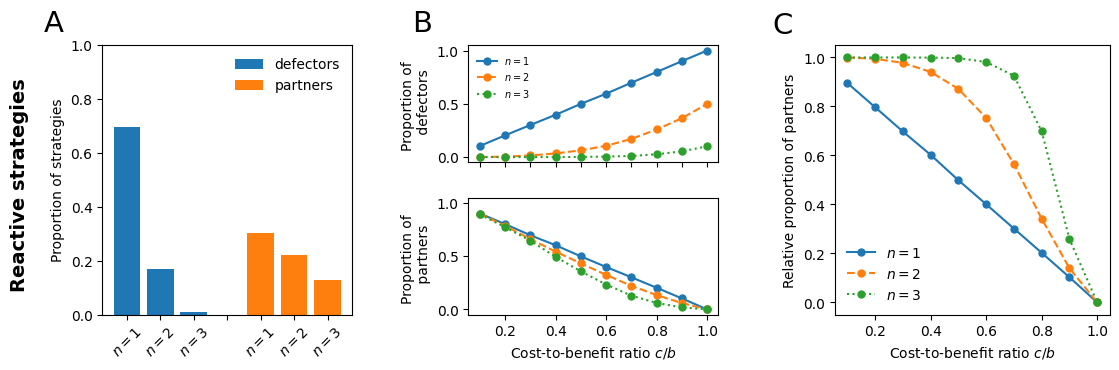

In [36]:
fig, axes = plt.subplot_mosaic("ABD;ACD",
                               figsize=(13, 3.5),
                               gridspec_kw = {'width_ratios':[1, 1, 1.1]})


# REACTIVE "A"
axes["A"].bar(range(3), data[6] / 10 ** 4, label="defectors");

axes["A"].bar(range(4, 7), coop_data[6] / 10 ** 4, label="partners");

axes["A"].set_ylabel("Proportion of strategies")

axes["A"].set_xticks(range(7),
                     ["$n=1$", "$n=2$", "$n=3$", "", "$n=1$", "$n=2$", "$n=3$"],
                    rotation=45)

axes["A"].text(-2.5, 1.05, "A", fontsize=21)

axes["A"].set_ylim(0, 1)


# REACTIVE "B"

axes["B"].plot(costs, data / 10 ** 4, marker='o', label=["$n=1$", "$n=2$", "$n=3$"], markersize=5);

axes["B"].set_ylabel("Proportion of \n defectors")
    
axes["B"].text(-.17, 1.18, "B", fontsize=21)

axes["B"].set_xticks(costs, ["" for _ in costs])

# REACTIVE "C"

axes["C"].plot(costs, coop_data / 10 ** 4, marker='o', markersize=5);

axes["C"].set_ylabel("Proportion of \n partners")


# REACTIVE "D"

axes["D"].plot(costs, coop_data / sum([data, coop_data]),
               marker='o',
               label=["$n=1$", "$n=2$", "$n=3$"],
               markersize=5);

axes["D"].set_ylabel("Relative proportion of partners")

axes["D"].text(-.17, 1.1, "C", fontsize=21)

# OVERALL

for lineB, lineC, lineD, ls in zip(axes["B"].get_lines(),
                                   axes["C"].get_lines(),
                                   axes["D"].get_lines(),
                                   linestyles):
    lineB.set_linestyle(ls)
    lineC.set_linestyle(ls)
    lineD.set_linestyle(ls)

for letter in ["C", "D"]:
    axes[letter].set_xlabel("Cost-to-beneﬁt ratio $c/b$")
#     axes[letter].set_facecolor(color)
    
for letter in ["A", "D"]:
    axes[letter].legend(frameon=False);

# axes["A"].set_facecolor(color)
# axes["B"].set_facecolor(color)

axes["A"].text(-3.5, 0.1,
               "Reactive strategies",
               rotation=90, fontsize=14,
               fontweight='bold')
axes["B"].legend(fontsize=7, frameon=False);
    
xmin,xmax = axes["B"].get_xlim()
ymin,ymax = axes["B"].get_ylim()

axes["C"].set_xlim(xmin,xmax)
axes["C"].set_ylim(ymin,ymax)

# fig.patch.set_facecolor(color)

    
fig.subplots_adjust(wspace=.45, hspace=.3)

fig.savefig("../figures/siFig1.pdf", bbox_inches="tight")

In [37]:
color = '#FDF6E3'

### Counting 

In [38]:
defective_files = [f'DefectingNashCounting/cost_{cval}_defective_Nash' for cval in costs]

cooperative_files = [f'DefectingNashCounting/cost_{cval}_cooperative_Nash' for cval in costs]

In [39]:
data = np.zeros((10, 3))

for i, file in enumerate(defective_files):
    
    df = pd.read_csv(file, header=0, low_memory=False, index_col=0)
    
    if len(df) > 0:

        if "3" in df.columns:
            data[i, 0] = df[df["3"] == 'one']["0"].nunique()

        if "4" in df.columns:
            data[i, 1] = df[df["4"] == 'two']["0"].nunique()

        if "5" in df.columns:
            data[i, 2] = df[df["5"] == 'three']["0"].nunique()

In [40]:
coop_data = np.zeros((10, 3))

for i, file in enumerate(cooperative_files):
    
    df = pd.read_csv(file, header=0, low_memory=False, index_col=0)
    
    if len(df) > 0:

        if "3" in df.columns:
            coop_data[i, 0] = df[df["3"] == 'one']["0"].nunique()

        if "4" in df.columns:
            coop_data[i, 1] = df[df["4"] == 'two']["0"].nunique()

        if "5" in df.columns:
            coop_data[i, 2] = df[df["5"] == 'three']["0"].nunique()

In [41]:
linestyles = ["-", "--", ":"]

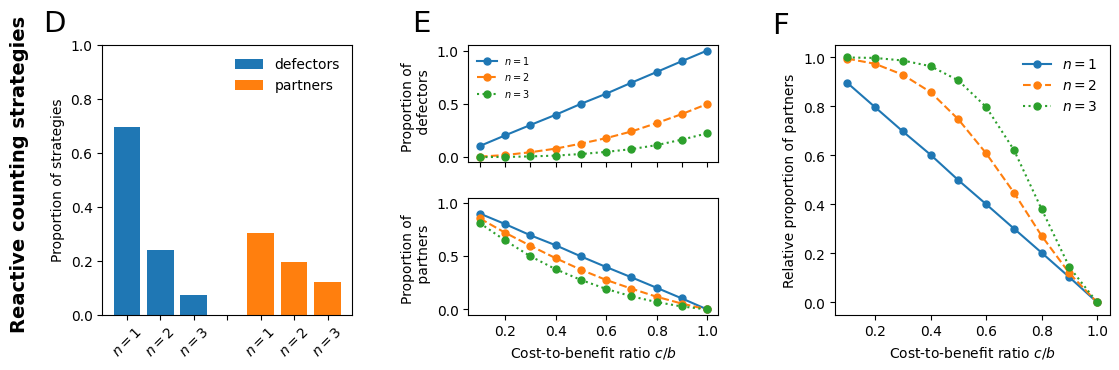

In [43]:
fig, axes = plt.subplot_mosaic("ABD;ACD",
                               figsize=(13, 3.5),
                               gridspec_kw = {'width_ratios':[1, 1, 1.1]})


# REACTIVE COUNTING "A"
axes["A"].bar(range(3), data[6] / 10 ** 4, label="defectors");

axes["A"].bar(range(4, 7), coop_data[6] / 10 ** 4, label="partners");

axes["A"].set_ylabel("Proportion of strategies")

axes["A"].set_xticks(range(7),
                     ["$n=1$", "$n=2$", "$n=3$", "", "$n=1$", "$n=2$", "$n=3$"],
                    rotation=45)

axes["A"].text(-2.5, 1.05, "D", fontsize=21)

axes["A"].set_ylim(0, 1)


# REACTIVE COUNTING "B"

axes["B"].plot(costs, data / 10 ** 4, marker='o', label=["$n=1$", "$n=2$", "$n=3$"], markersize=5);

axes["B"].set_ylabel("Proportion of \n defectors")
    
axes["B"].text(-.17, 1.18, "E", fontsize=21)

axes["B"].set_xticks(costs, ["" for _ in costs])

# REACTIVE COUNTING "C"

axes["C"].plot(costs, coop_data / 10 ** 4, marker='o', markersize=5);

axes["C"].set_ylabel("Proportion of \n partners")


# REACTIVE COUNTING "D"

axes["D"].plot(costs, coop_data / sum([data, coop_data]),
               marker='o',
               label=["$n=1$", "$n=2$", "$n=3$"],
               markersize=5);

axes["D"].set_ylabel("Relative proportion of partners")

axes["D"].text(-.17, 1.1, "F", fontsize=21)

# OVERALL

for lineB, lineC, lineD, ls in zip(axes["B"].get_lines(),
                                   axes["C"].get_lines(),
                                   axes["D"].get_lines(),
                                   linestyles):
    lineB.set_linestyle(ls)
    lineC.set_linestyle(ls)
    lineD.set_linestyle(ls)

for letter in ["C", "D"]:
    axes[letter].set_xlabel("Cost-to-beneﬁt ratio $c/b$")
    
for letter in ["A", "D"]:
    axes[letter].legend(frameon=False);


axes["A"].text(-3.5, -.05,
               "Reactive counting strategies",
               rotation=90, fontsize=14,
               fontweight='bold')
axes["B"].legend(fontsize=7, frameon=False);
    
xmin,xmax = axes["B"].get_xlim()
ymin,ymax = axes["B"].get_ylim()

axes["C"].set_xlim(xmin,xmax)
axes["C"].set_ylim(ymin,ymax)

    
fig.subplots_adjust(wspace=.45, hspace=.3)

fig.savefig("../figures/siFig1Counting.pdf", bbox_inches="tight")

# Checking the $n=1$ case.

In [ ]:
costs = np.linspace(0.1, 1, 10)

memor = ['one', 'two', 'three']

pure_strategies = [list(itertools.product([0, 1], repeat=2)),
                   list(itertools.product([0, 1], repeat=4)),
                   list(itertools.product([0, 1], repeat=8))]

dims = [2, 4, 8]

In [ ]:
max_iterations = 10 ** 4

bval = 1;

for cval in tqdm(costs):


    dnash, gnash, notdnash, notgnash = [], [], [], []

    for memory, pure_set, sdim in zip(memories, pure_strategies, dims):

        for i in range(max_iterations):

            np.random.seed(i)

            player = np.random.random(sdim)

            defecting_player = player.copy()
            defecting_player[-1] = 0

            cooperative_player = player.copy()
            cooperative_player[0] = 1

            checksA, checksB = [], []

            for coplayer in pure_set:

                payoff_defective = match_payoffs(defecting_player, coplayer, bval, cval, memory=memory)

                checkA = np.isclose(payoff_defective, 0, atol=10 ** -4) or payoff_defective < 0

                checksA.append(checkA)


                payoff_cooperative = match_payoffs(cooperative_player, coplayer, bval, cval, memory=memory)

                checkB = np.isclose(payoff_cooperative, bval - cval, atol=10 ** -4) or payoff_cooperative < (bval - cval)

                checksB.append(checkB)

            if all(checksA) == True:
                dnash.append([i, *defecting_player, *checksA, memory])
            else:
                notdnash.append([i, *defecting_player, *checksA, memory])


            if all(checksB) == True:
                gnash.append([i, *cooperative_player, *checksB, memory])
            else:
                notgnash.append([i, *cooperative_player, *checksB, memory])